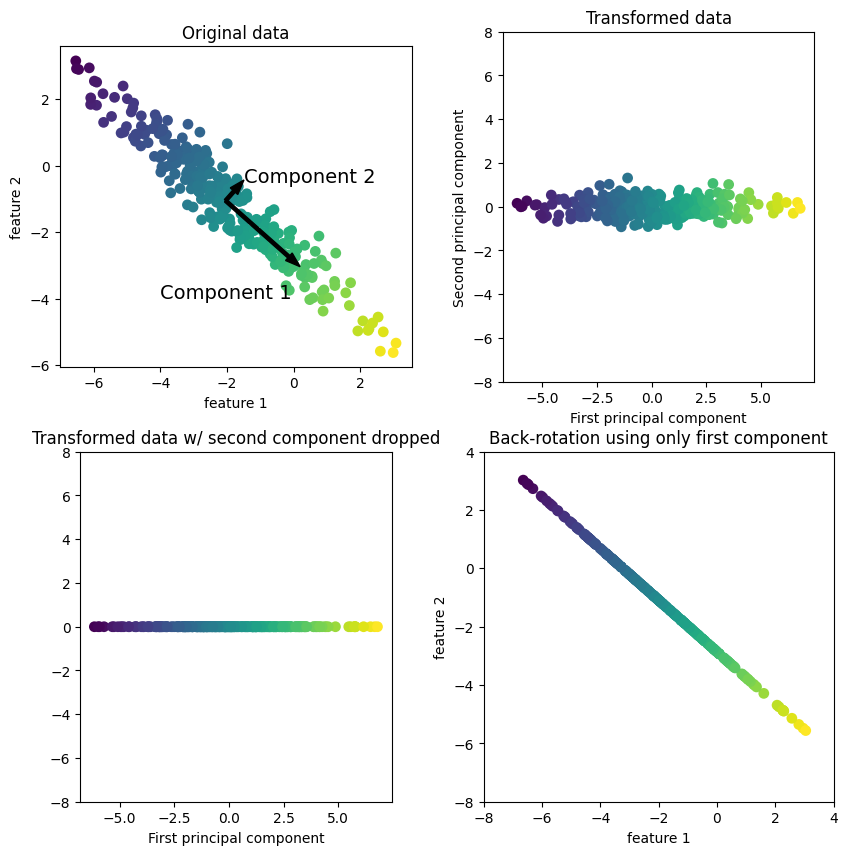

In [3]:
%matplotlib inline

# L'analyse en composante principale permet de décorréler des caractéristiques statistiquement corrélées

import mglearn

mglearn.plots.plot_pca_illustration()

# L'algo cherche les vexteurs orthogonaux entre eux qui induisent le maximum de variance, ce sont les principales 
# directions de la variance dans les données

# Les schémas du bas illustre un exemple de suppression de bruit : on ne conserve que la composante principale
# qui nous intéresse et on transforme à l'inverse pour revenir dans le domaine de définition des données 
# originelles


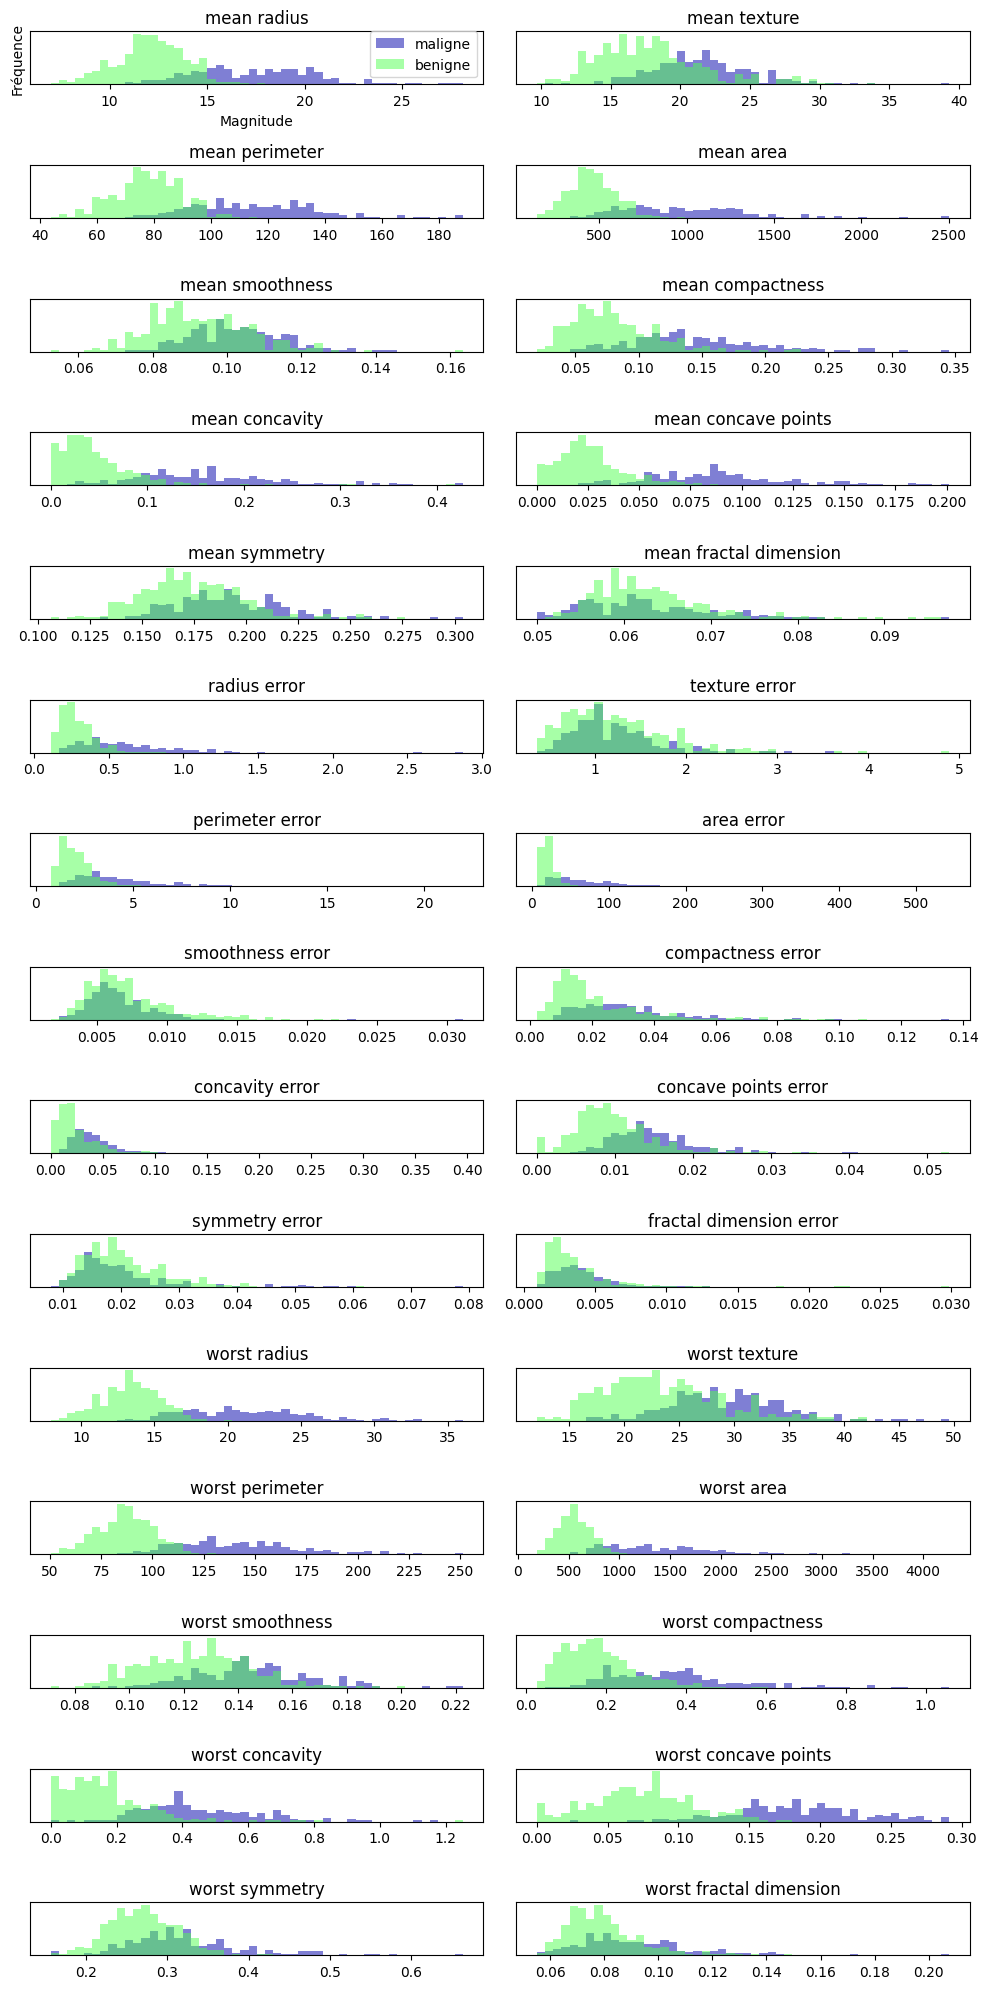

In [7]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

bc_dataset = load_breast_cancer()

fig,axes = plt.subplots(15,2,figsize=(10,20))
malignes = bc_dataset.data[bc_dataset.target == 0]
benignes = bc_dataset.data[bc_dataset.target == 1]

ax = axes.ravel()
for i in range(30) :
    _,bins = np.histogram(bc_dataset.data[:,i],bins=50)
    ax[i].hist(malignes[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benignes[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(bc_dataset.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Magnitude")
ax[0].set_ylabel("Fréquence")
ax[0].legend(["maligne","benigne"], loc="best")
fig.tight_layout()

# On subdivise le domaine de définition réduit de chaque caratéristique par le même nombre : le nombre d'échelon.
# La granularité introduite permet de compter le nombre d'échantillon participant d'un échelon en particulier :
# on compte la fréquence des échantillons appartenant à l'échelon pour une caractéristique
# Comme chaque échantillon appartient à une classe, on peut faire apparaître la fréquence par classe et par caractéristique.

In [10]:
# On peut ainsi voir les caractéristiques qui participent à la distinction de classe. 
# Puis on peut essayer de déterminer les interactions entre ces caractéristiques via PCA.

# On transforme les données pour que la variance soit de 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(bc_dataset.data)
X_scaled = scaler.transform(bc_dataset.data)

# On cherche à ne produire que deux composantes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Forme originelle : {}".format(X_scaled.shape))
print("Forme transformée : {}".format(X_pca.shape))

Forme originelle : (569, 30)
Forme transformée : (569, 2)


Text(0, 0.5, 'Composante principale 2')

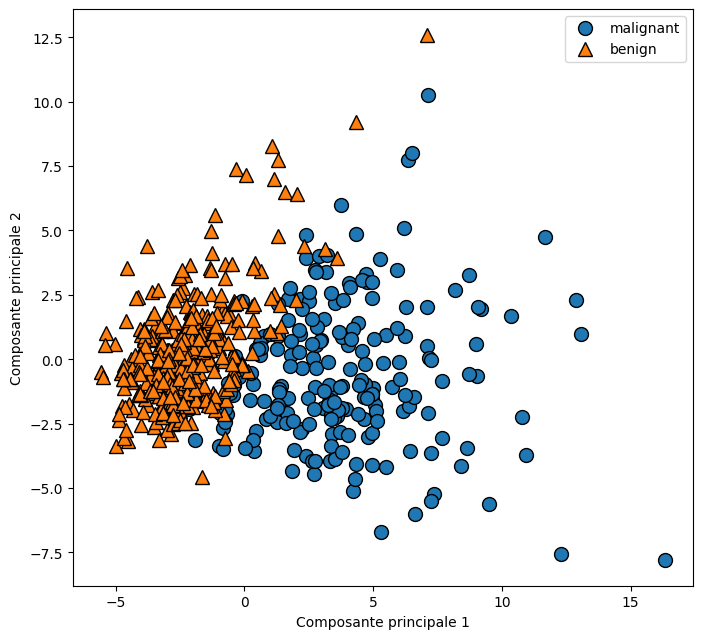

In [12]:
# En traçant les composantes principales : 
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],bc_dataset.target)
plt.legend(bc_dataset.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")

In [15]:
# L'algo PCA est un apprentissage non supervisé : il cherche des corrélations dans les données.
# On peut donc difficilement formuler ce à quoi correspond les composantes principales trouvées

print("Forme des composantes PCA : {}".format(pca.components_.shape))
print("Composantes principales : \n{}".format(pca.components_))

Forme des composantes PCA : (2, 30)
Composantes principales : 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Composantes principales')

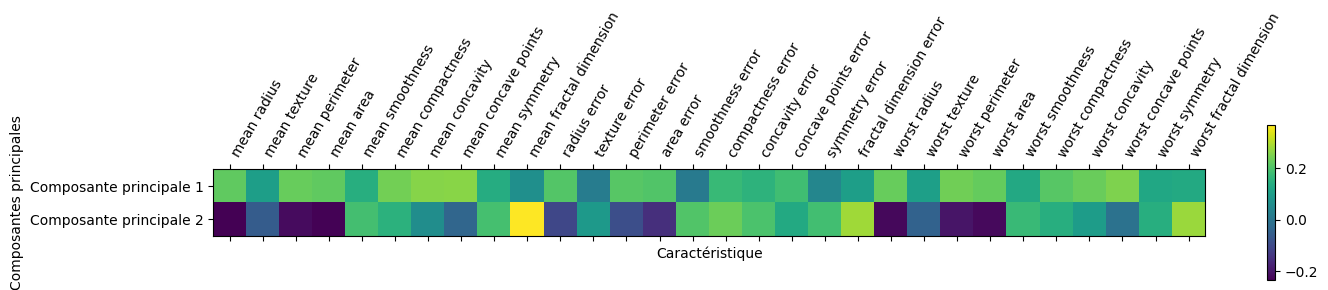

In [16]:
# Les coordonnées des composantes principales sont exprimées dans l'espace des caractéristiques originales
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],["Composante principale 1","Composante principale 2"])
plt.colorbar()
plt.xticks(range(len(bc_dataset.feature_names)), bc_dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Caractéristique")
plt.ylabel("Composantes principales")